In [1]:
import requests
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import warnings
import datetime
warnings.filterwarnings("ignore")

# Import the API key
from ipython_config import fredaccount_key as api_key

In [2]:
series = "GFDEBTN"
url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series}&api_key={api_key}&file_type=json"
percent_change = Path("Resource/TFD_PC.csv")

In [3]:
data_url = requests.get(url).json()
print(data_url)

{'realtime_start': '2023-05-03', 'realtime_end': '2023-05-03', 'observation_start': '1600-01-01', 'observation_end': '9999-12-31', 'units': 'lin', 'output_type': 1, 'file_type': 'json', 'order_by': 'observation_date', 'sort_order': 'asc', 'count': 228, 'offset': 0, 'limit': 100000, 'observations': [{'realtime_start': '2023-05-03', 'realtime_end': '2023-05-03', 'date': '1966-01-01', 'value': '320999'}, {'realtime_start': '2023-05-03', 'realtime_end': '2023-05-03', 'date': '1966-04-01', 'value': '316097'}, {'realtime_start': '2023-05-03', 'realtime_end': '2023-05-03', 'date': '1966-07-01', 'value': '324748'}, {'realtime_start': '2023-05-03', 'realtime_end': '2023-05-03', 'date': '1966-10-01', 'value': '329319'}, {'realtime_start': '2023-05-03', 'realtime_end': '2023-05-03', 'date': '1967-01-01', 'value': '330947'}, {'realtime_start': '2023-05-03', 'realtime_end': '2023-05-03', 'date': '1967-04-01', 'value': '322893'}, {'realtime_start': '2023-05-03', 'realtime_end': '2023-05-03', 'date':

In [4]:
print(json.dumps(data_url, indent=4, sort_keys=True))

{
    "count": 228,
    "file_type": "json",
    "limit": 100000,
    "observation_end": "9999-12-31",
    "observation_start": "1600-01-01",
    "observations": [
        {
            "date": "1966-01-01",
            "realtime_end": "2023-05-03",
            "realtime_start": "2023-05-03",
            "value": "320999"
        },
        {
            "date": "1966-04-01",
            "realtime_end": "2023-05-03",
            "realtime_start": "2023-05-03",
            "value": "316097"
        },
        {
            "date": "1966-07-01",
            "realtime_end": "2023-05-03",
            "realtime_start": "2023-05-03",
            "value": "324748"
        },
        {
            "date": "1966-10-01",
            "realtime_end": "2023-05-03",
            "realtime_start": "2023-05-03",
            "value": "329319"
        },
        {
            "date": "1967-01-01",
            "realtime_end": "2023-05-03",
            "realtime_start": "2023-05-03",
            "value": "

In [5]:
observ = data_url['observations']
print(json.dumps(observ, indent=4, sort_keys=True))

[
    {
        "date": "1966-01-01",
        "realtime_end": "2023-05-03",
        "realtime_start": "2023-05-03",
        "value": "320999"
    },
    {
        "date": "1966-04-01",
        "realtime_end": "2023-05-03",
        "realtime_start": "2023-05-03",
        "value": "316097"
    },
    {
        "date": "1966-07-01",
        "realtime_end": "2023-05-03",
        "realtime_start": "2023-05-03",
        "value": "324748"
    },
    {
        "date": "1966-10-01",
        "realtime_end": "2023-05-03",
        "realtime_start": "2023-05-03",
        "value": "329319"
    },
    {
        "date": "1967-01-01",
        "realtime_end": "2023-05-03",
        "realtime_start": "2023-05-03",
        "value": "330947"
    },
    {
        "date": "1967-04-01",
        "realtime_end": "2023-05-03",
        "realtime_start": "2023-05-03",
        "value": "322893"
    },
    {
        "date": "1967-07-01",
        "realtime_end": "2023-05-03",
        "realtime_start": "2023-05-03",
  

In [6]:
df_observ = pd.DataFrame(observ)
df_final_data = df_observ.drop(columns=["realtime_start", "realtime_end"])
formatted_observ = pd.to_datetime(df_final_data['date'])
filtered_data= df_final_data[formatted_observ.dt.year >= 2018]
filtered_data['value'] = pd.to_numeric(filtered_data['value'])
filtered_data.head()

,date,value
208,2018-01-01,21089643.0
209,2018-04-01,21195070.0
210,2018-07-01,21516058.0
211,2018-10-01,21974096.0
212,2019-01-01,22027880.0


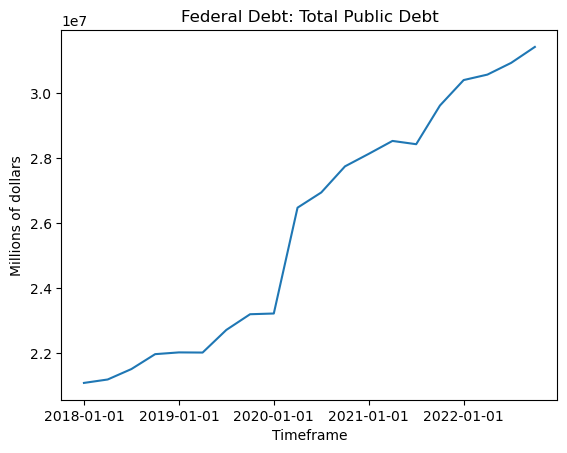

In [7]:
plt.plot(filtered_data['date'], filtered_data['value'])
plt.xlabel('Timeframe')
plt.ylabel('Millions of dollars')
plt.xticks(filtered_data['date'][::len(filtered_data['date'])//5])
plt.title('Federal Debt: Total Public Debt')
plt.show()

In [8]:
print("$22,000,000 is the minimum of the graph")

$22,000,000 is the minimum of the graph


In [11]:
loan_df = pd.read_csv(loan_file)
pc_df = pd.DataFrame(percent_change)
dc_df

ValueError: DataFrame constructor not properly called!